In [88]:
df_sessions=df.drop("ga_users",axis=1)

In [90]:
df_sessions

,week,weekstart,sessions
0,2019-01,2019-01-01,727481
1,2019-02,2019-01-07,931254
2,2019-03,2019-01-14,913018
3,2019-04,2019-01-21,993692
4,2019-05,2019-01-28,973372
...,...,...,...
100,2020-49,2020-11-30,4712741
101,2020-50,2020-12-07,3900787
102,2020-51,2020-12-14,3240572
103,2020-52,2020-12-21,2796519


In [42]:
df_sessions=df_sessions.drop(labels=104,axis=0)

In [59]:
df_sessions.index = df_sessions.week

In [72]:
df_sessions=df_sessions.drop("week",axis=1)

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_sessions, model='additive',period=52)

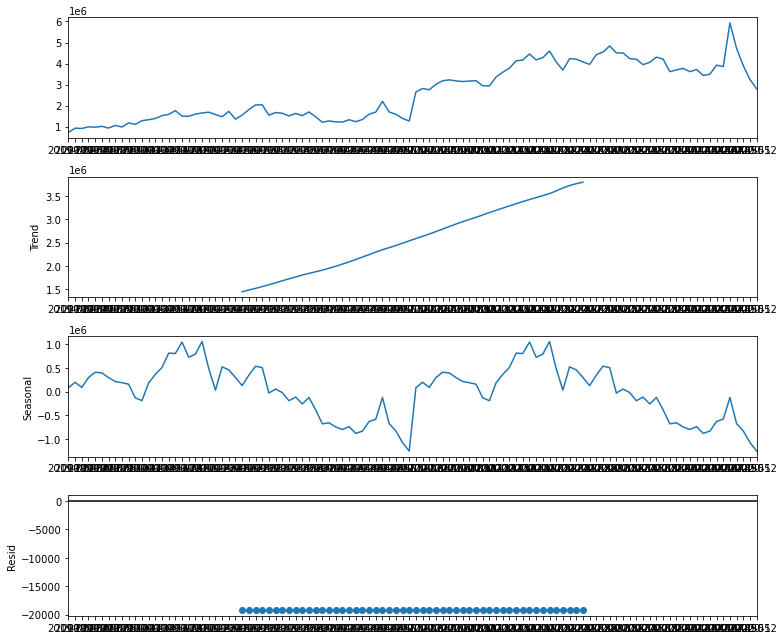

In [82]:
from pylab import rcParams
rcParams['figure.figsize']=11, 9
result.plot()
plt.show()

In [83]:
print(result.seasonal)

week
2019-01    8.206289e+04
2019-02    1.969569e+05
2019-03    8.723481e+04
2019-04    2.958580e+05
2019-05    4.083114e+05
               ...     
2020-48   -1.244324e+05
2020-49   -6.753119e+05
2020-50   -8.296880e+05
2020-51   -1.075753e+06
2020-52   -1.253233e+06
Name: seasonal, Length: 104, dtype: float64


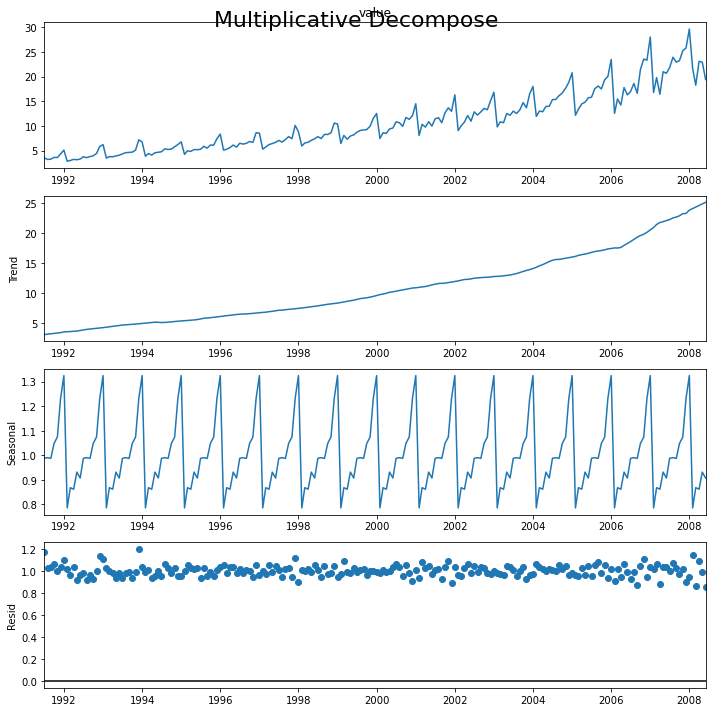

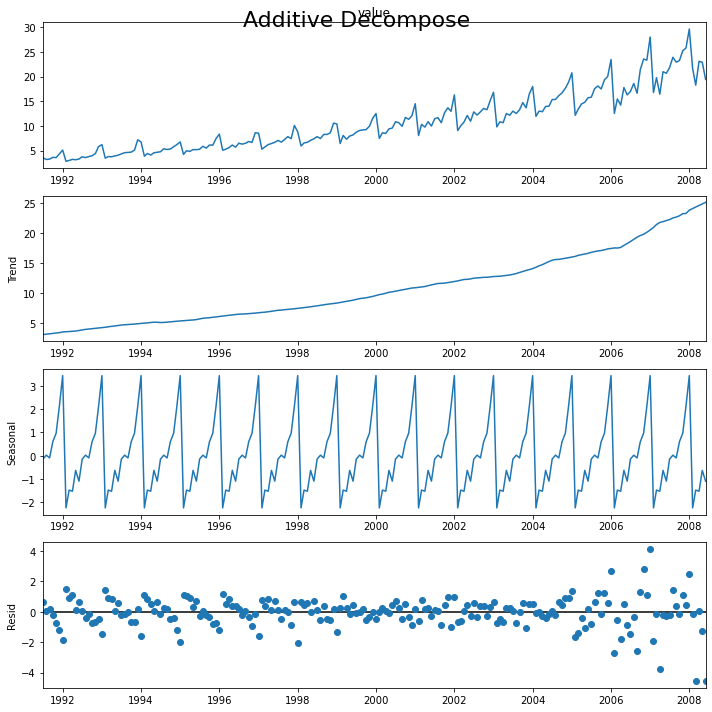

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [85]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


In [169]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as ols

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv(r'C:\Users\yurong.mao\Desktop\python\weekly_session_gausers.csv', parse_dates=['date'], index_col='date')
df

,value
date,
2019-01-01,727481
2019-01-07,931254
2019-01-14,913018
2019-01-21,993692
2019-01-28,973372
...,...
2020-11-30,4712741
2020-12-07,3900787
2020-12-14,3240572


In [170]:
df.index = pd.to_datetime(df.index)

In [156]:
sm.tsa.seasonal_decompose(df.asfreq('W'), model = 'additive')

DatetimeIndex(['2019-01-01', '2019-01-07', '2019-01-14', '2019-01-21',
               '2019-01-28', '2019-02-04', '2019-02-11', '2019-02-18',
               '2019-02-25', '2019-03-04',
               ...
               '2020-10-26', '2020-11-02', '2020-11-09', '2020-11-16',
               '2020-11-23', '2020-11-30', '2020-12-07', '2020-12-14',
               '2020-12-21', '2020-12-28'],
              dtype='datetime64[ns]', name='date', length=105, freq=None)

In [174]:
df.asfreq('W-MON')

,value
date,
2019-01-07,931254
2019-01-14,913018
2019-01-21,993692
2019-01-28,973372
2019-02-04,1018365
...,...
2020-11-30,4712741
2020-12-07,3900787
2020-12-14,3240572


In [177]:
decomp=sm.tsa.seasonal_decompose(df.asfreq('W-MON'), model = 'additive')

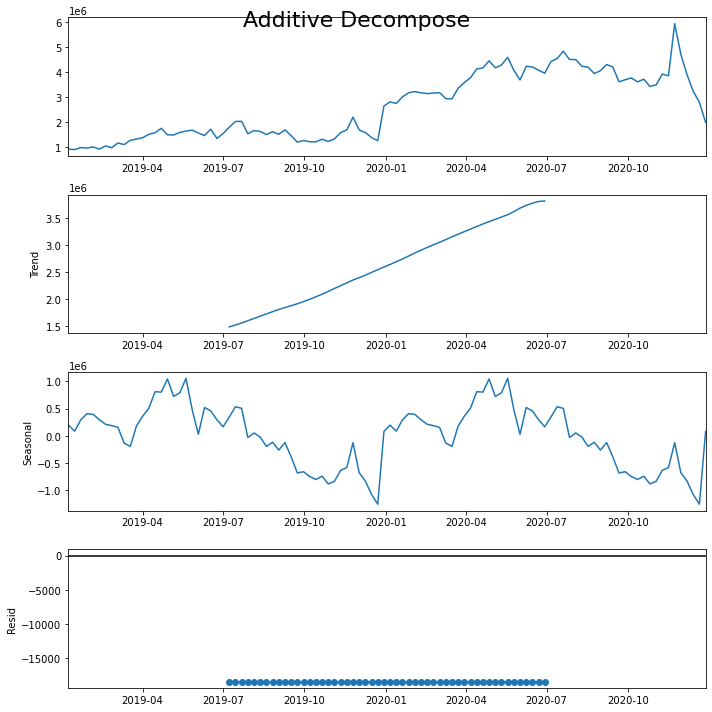

In [178]:

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})

fig=decomp.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()


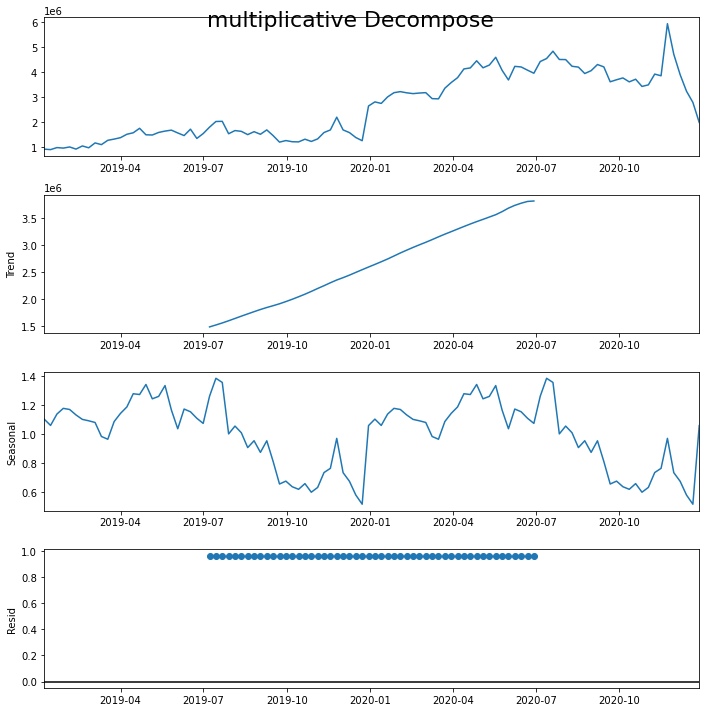

In [180]:
decomp=sm.tsa.seasonal_decompose(df.asfreq('W-MON'), model = 'multiplicative')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})

fig=decomp.plot().suptitle('multiplicative Decompose', fontsize=22)
plt.show()

AttributeError: 'DatetimeIndex' object has no attribute 'to_timestamp'

SyntaxError: invalid syntax (<ipython-input-173-187530c6800e>, line 2)

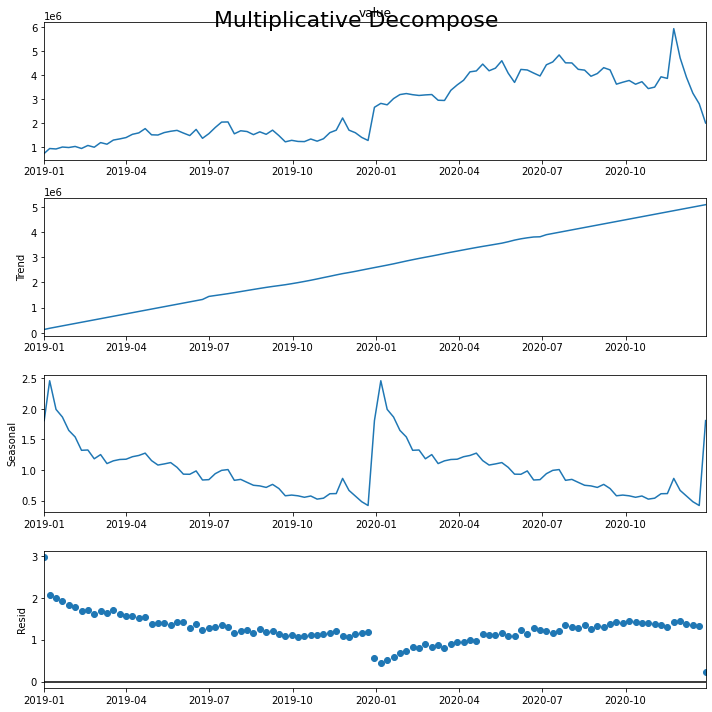

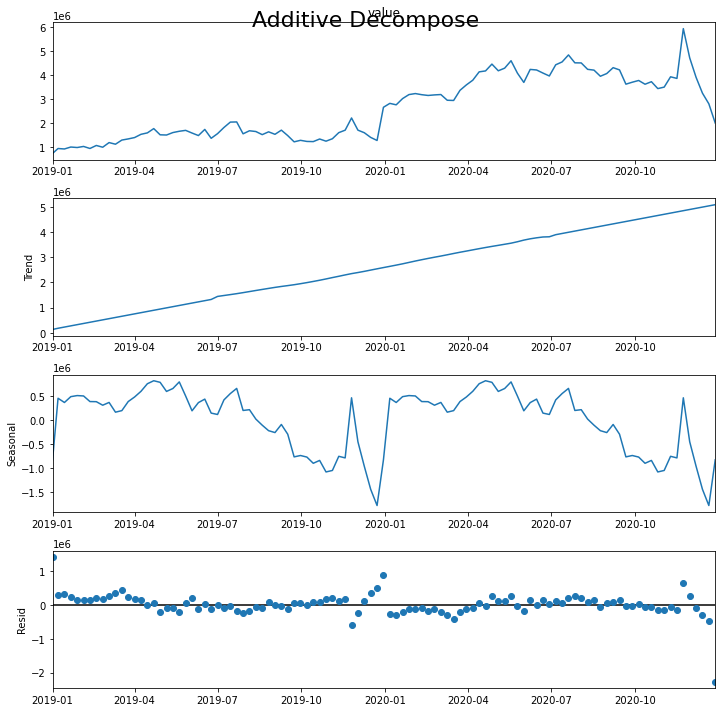

In [148]:

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq', period=52)

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq', period=52)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()


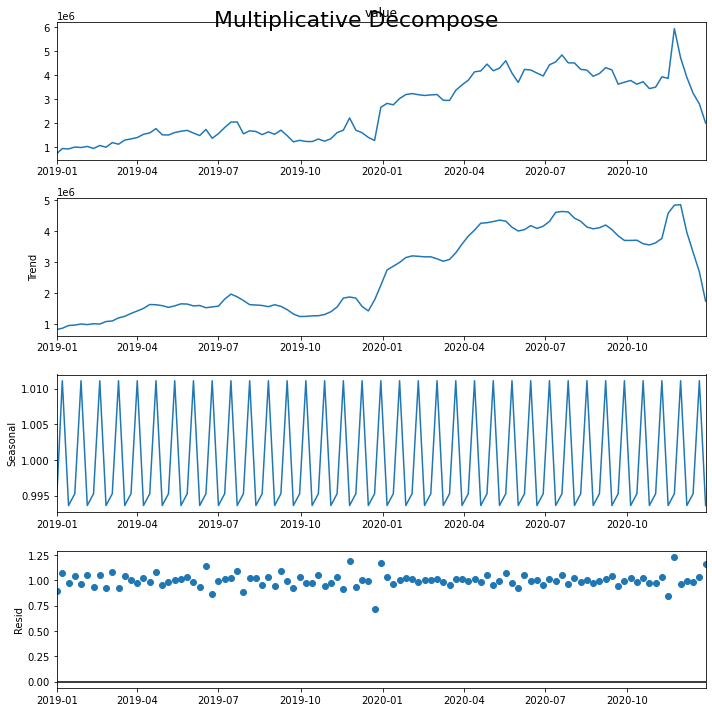

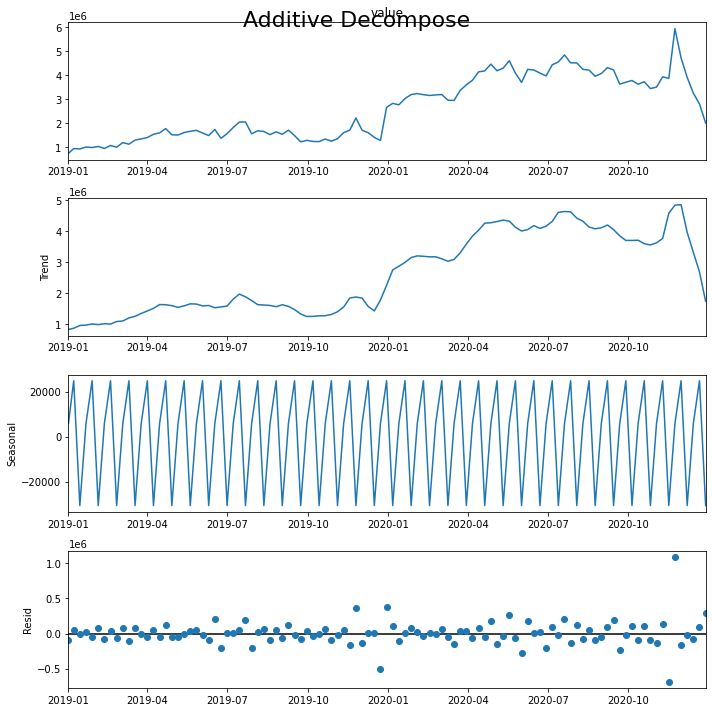

In [150]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq', period=2)

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq', period=2)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

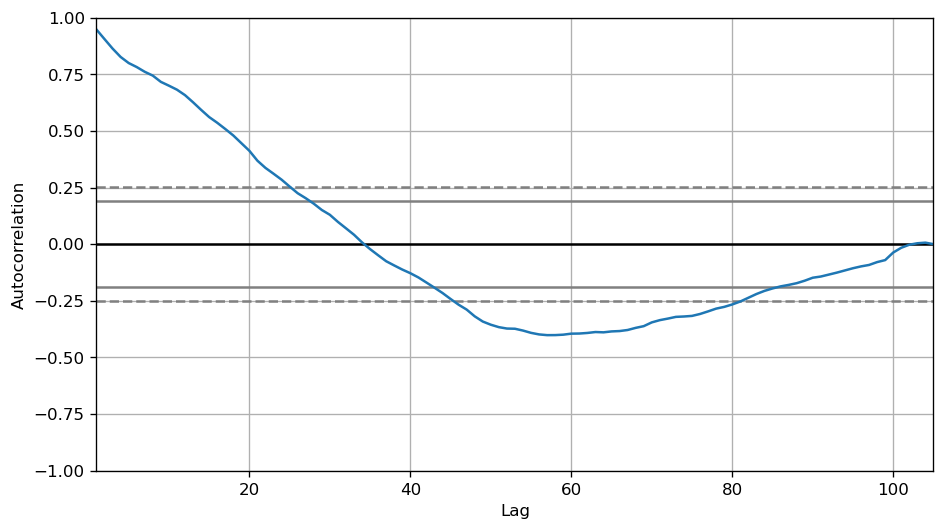

In [152]:
from pandas.plotting import autocorrelation_plot
df = pd.read_csv(r'C:\Users\yurong.mao\Desktop\python\weekly_session_gausers.csv')

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist())

week
2019-01    8.206289e+04
2019-02    1.969569e+05
2019-03    8.723481e+04
2019-04    2.958580e+05
2019-05    4.083114e+05
               ...     
2020-48   -1.244324e+05
2020-49   -6.753119e+05
2020-50   -8.296880e+05
2020-51   -1.075753e+06
2020-52   -1.253233e+06
Name: seasonal, Length: 104, dtype: float64
